In [1]:
local_data_dir = '/Users/shanydanieli/projects/merian/observing/data/'
loca_catalog_dir = '/Users/shanydanieli/research/soft/skipper/json/'
git_data_dir = '/Users/shanydanieli/research/soft/skipper/data/'
git_point_dir = '/Users/shanydanieli/research/soft/skipper/pointings/'
datalogs_dir = '/Users/shanydanieli/projects/merian/observing/datalogs/'

In [2]:
import numpy as np
import healpy as hp
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

from astropy import coordinates
from astropy import units as u
from astropy.io import fits
from datetime import date


from shapely import geometry
from shapely.ops import unary_union
from shapely.geometry import Point
from descartes.patch import PolygonPatch

from skipper import observe, shape, hsc, tiling


### make the decam camera

In [3]:
decam_corners = np.load(git_data_dir+'decam_corners.npy',allow_pickle='True')
ccd_poly = []
for i in range(len(decam_corners)):
    poly = geometry.Polygon(decam_corners[i])
    ccd_poly.append(poly)
    
all_ccds = unary_union(ccd_poly)


In [16]:
plt.rcParams["font.family"] = 'Times New Roman'
# plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["font.size"] = 20
plt.rcParams['axes.titlepad'] = 25

In [59]:
gama = pd.read_csv(loca_catalog_dir+'gama.csv', index_col=0)
ra = gama['RA']
dec = gama['dec']

In [60]:
# observed = [10,20,30,40,50,60,300,400,500,600,700,800]

# fig = plt.figure(1, figsize=(12, 6), dpi=180)
# for i in range(len(ra)):
# # for i in range(10):
#     decam_corners = np.load(git_data_dir+'decam_corners.npy',allow_pickle='True')
#     ccd_poly = []
#     for j in range(len(decam_corners)):
#         corners = decam_corners[j]
#         radec = [ra[i],dec[i]]
#         add_array = np.array([radec,radec,radec,radec])
#         shift_array = np.add(corners, add_array)        
#         poly = geometry.Polygon(shift_array)
#         ccd_poly.append(poly)
#     all_ccds = unary_union(ccd_poly)
#     if i not in observed:
#         patch_ccd = PolygonPatch(all_ccds, edgecolor='k',facecolor='gray',lw=0.4,alpha=0.05)
#     else:
#         patch_ccd = PolygonPatch(all_ccds, edgecolor='k',facecolor='#41ab5d',lw=0.4,alpha=0.7)
#     ax = fig.add_subplot(111, aspect='equal')
#     ax.add_patch(patch_ccd)


    
    
# for i in range(len(ra)):
#     if i not in observed:
#         ax.scatter(ra[i],dec[i],s=3, color='#e31a1c')
#     else:
#         ax.scatter(ra[i],dec[i],s=3, color='#41ab5d')
    
# # ax.set_xlim(125,225)
# ax.set_xlim(125,170)
# ax.set_ylim(-3,6)

# ax.set_title('Merian Survey Progress Map, '+str(today), fontsize=20)
# ax.set_xlabel('R.A.')
# ax.set_ylabel('Decl.')

# today = date.today()


# ax.text(125,-11.5,'2021A Observing Run Progress Summary \n Total # of fields to observe: '+str(len(ra)) + 
#         '\n Fields observed to date: '+str(len(observed)), bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', ls=':'))

# plt.savefig('../figures/survey_progress_map_'+str(today)+'.jpeg', bbox_inches='tight',dpi=500)


In [6]:
# # load the Merian logo
# im = image.imread('/Users/shanydanieli/Downloads/logo_wbbox.png')
# imagebox = OffsetImage(im, zoom=0.05)
# ab = AnnotationBbox(imagebox, (128, 6.5))


## Plot updated survey progress map

In [8]:
# read catalog expected pointings 
expected2021A = pd.read_csv(git_point_dir+'S2021A.csv', index_col=0)
ra = expected2021A['RA']
dec = expected2021A['dec']

# cross-match with last night observations log
# observed_pd = pd.read_csv(datalogs_dir+'20210305_06.csv', index_col=0)
# observed_pd = pd.read_csv('/Users/shanydanieli/Downloads/execute.csv', index_col=0)
observed_pd = pd.read_csv('/Users/shanydanieli/Downloads/tele20210317.csv', index_col=0)


observed = observed_pd['object'].tolist()

In [10]:
# len(S2021A.csv)

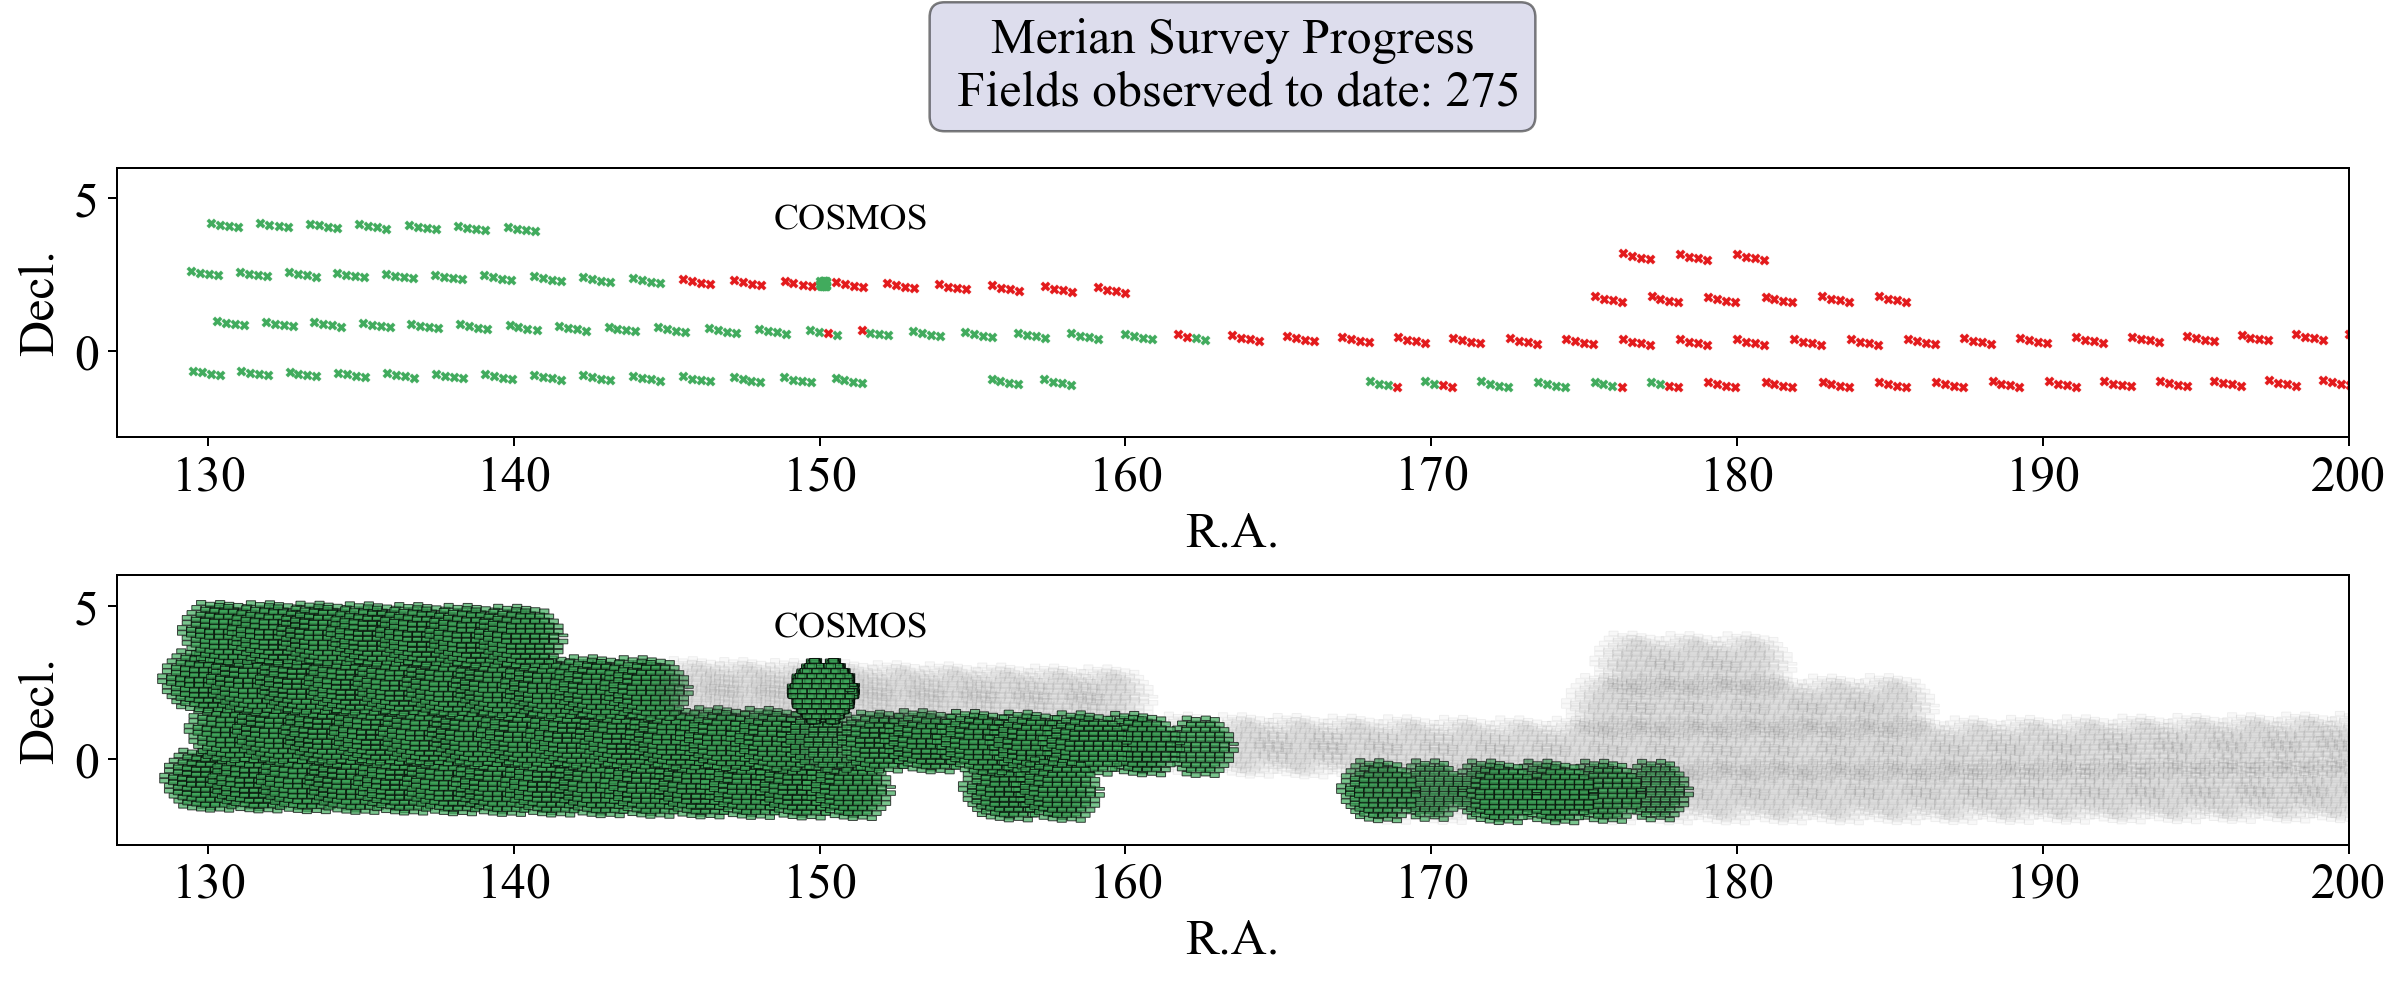

In [23]:
count_observed = 0
# fig = plt.figure(1, figsize=(12, 8.5), dpi=180)
fig = plt.figure(1, figsize=(16, 5.5), dpi=180)
ax = fig.add_subplot(211, aspect='equal')
ax2 = fig.add_subplot(212, aspect='equal')
for i in range(len(ra)):
    obj_name = expected2021A['object.1'][i]
# for i in range(10):
    decam_corners = np.load(git_data_dir+'decam_corners.npy',allow_pickle='True')
    ccd_poly = []
    for j in range(len(decam_corners)):
        corners = decam_corners[j]
        radec = [ra[i],dec[i]]
        add_array = np.array([radec,radec,radec,radec])
        shift_array = np.add(corners, add_array)        
        poly = geometry.Polygon(shift_array)
        ccd_poly.append(poly)
    all_ccds = unary_union(ccd_poly)
    if obj_name not in observed:
        patch_ccd = PolygonPatch(all_ccds, edgecolor='k',facecolor='gray',lw=0.4,alpha=0.05)
    else:
        patch_ccd = PolygonPatch(all_ccds, edgecolor='k',facecolor='#41ab5d',lw=0.4,alpha=0.7)
    ax2.add_patch(patch_ccd)

    
for i in range(len(ra)):
    obj_name = expected2021A['object.1'][i]
    if obj_name not in observed:
        ax.scatter(ra[i],dec[i],s=15, color='#e31a1c', marker='X', lw=0.05)
    else:
        count_observed += 1
        ax.scatter(ra[i],dec[i],s=15, color='#41ab5d', marker='X', lw=0.05) # observed

        
# ax.set_xlim(125,225)
ax.set_xlim(127,200)
ax.set_ylim(-2.8,6)
ax2.set_xlim(127,200)
ax2.set_ylim(-2.8,6)

today = date.today()

# title = ax.set_title('Merian Survey Progress, '+str(today)+
#              '\n Fields observed to date: '+ str(count_observed+6), fontsize=20, bbox = dict(boxstyle = 'round', fc='#bcbddc', alpha=0.5))
title = ax.set_title('Merian Survey Progress' +
             '\n Fields observed to date: '+ str(count_observed+9), fontsize=20, bbox = dict(boxstyle = 'round', fc='#bcbddc', alpha=0.5))


ax.set_xlabel('R.A.')
ax.set_ylabel('Decl.')
ax2.set_xlabel('R.A.')
ax2.set_ylabel('Decl.')

ax.text(148.5,4.0,'COSMOS', fontsize=15)
ax2.text(148.5,4.0,'COSMOS', fontsize=15)


# ax.add_artist(ab)


# ax2.text(127,-8.0,'2021A Observing Run Progress Summary \n Fields observed to date: '+ 
#          str(count_observed), bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', ls=':'))

fig.subplots_adjust(wspace=0.03)

plt.savefig('../figures/merian_progress.jpeg', bbox_inches='tight',dpi=500)

# plt.savefig('../figures/survey_progress_'+str(today)+'.jpeg', bbox_inches='tight',dpi=500)


In [14]:
count_observed

266

In [44]:
observed_pd

,date,ra,declination,object,filter,exptime,airmass,program,Unnamed: 9
id,,,,,,,,,
968905,2021-02-27 02:10:29.195274+00:00,130.252921,-2.280346,G09,N708,600.0,1.15,Merian,NaN
968906,2021-02-27 02:20:58.197735+00:00,130.542150,-2.338370,G09,N708,600.0,1.14,Merian,NaN
968907,2021-02-27 02:31:28.150568+00:00,130.835083,-2.375285,G09,N708,600.0,1.14,Merian,NaN
971657,2021-03-06 00:03:53.005315+00:00,129.427592,2.615155,GAMA_J083742.61+023654.55_N708_1minexp_checksky,N708,60.0,1.47,Merian,NaN
971658,2021-03-06 00:05:24.024268+00:00,129.427592,2.615155,GAMA_J083742.61+023654.55_N708_1minexp_checksky,N708,60.0,1.46,Merian,NaN
...,...,...,...,...,...,...,...,...,...
972361,2021-03-09 04:00:06.919121+00:00,150.044129,2.109797,COSMOS_J100010.59+020635.26_N708,N708,600.0,1.19,Merian,NaN
972362,2021-03-09 04:10:34.932912+00:00,150.050071,2.120355,COSMOS_J100012.01+020713.27_N708,N708,600.0,1.19,Merian,NaN
972363,2021-03-09 04:21:02.454682+00:00,150.182117,2.106744,COSMOS_J100043.70+020624.27_N708,N708,600.0,1.20,Merian,NaN


In [79]:
expected2021A.columns

Index(['comment', 'filter', 'seqtot', 'seqnum', 'seqid', 'expType', 'object.1',
       'proposer', 'program', 'RA', 'propid', 'dec', 'expTime', 'count',
       'wait'],
      dtype='object')

In [80]:
ra1 = expected2021A.loc['COSMOS_J100042.77+021227.08_N708'].RA
dec1 = expected2021A.loc['COSMOS_J100042.77+021227.08_N708'].dec

ra2 = expected2021A.loc['COSMOS_J100040.83+021453.04_N708'].RA
dec2 = expected2021A.loc['COSMOS_J100040.83+021453.04_N708'].dec

ra3 = expected2021A.loc['COSMOS_J100035.23+021317.07_N708'].RA
dec3 = expected2021A.loc['COSMOS_J100035.23+021317.07_N708'].dec

ra4 = expected2021A.loc['COSMOS_J100040.12+021303.97_N708'].RA
dec4 = expected2021A.loc['COSMOS_J100040.12+021303.97_N708'].dec

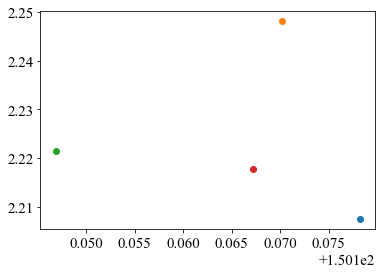

In [82]:
plt.scatter(ra1,dec1)
plt.scatter(ra2,dec2)
plt.scatter(ra3,dec3)
plt.scatter(ra4,dec4)

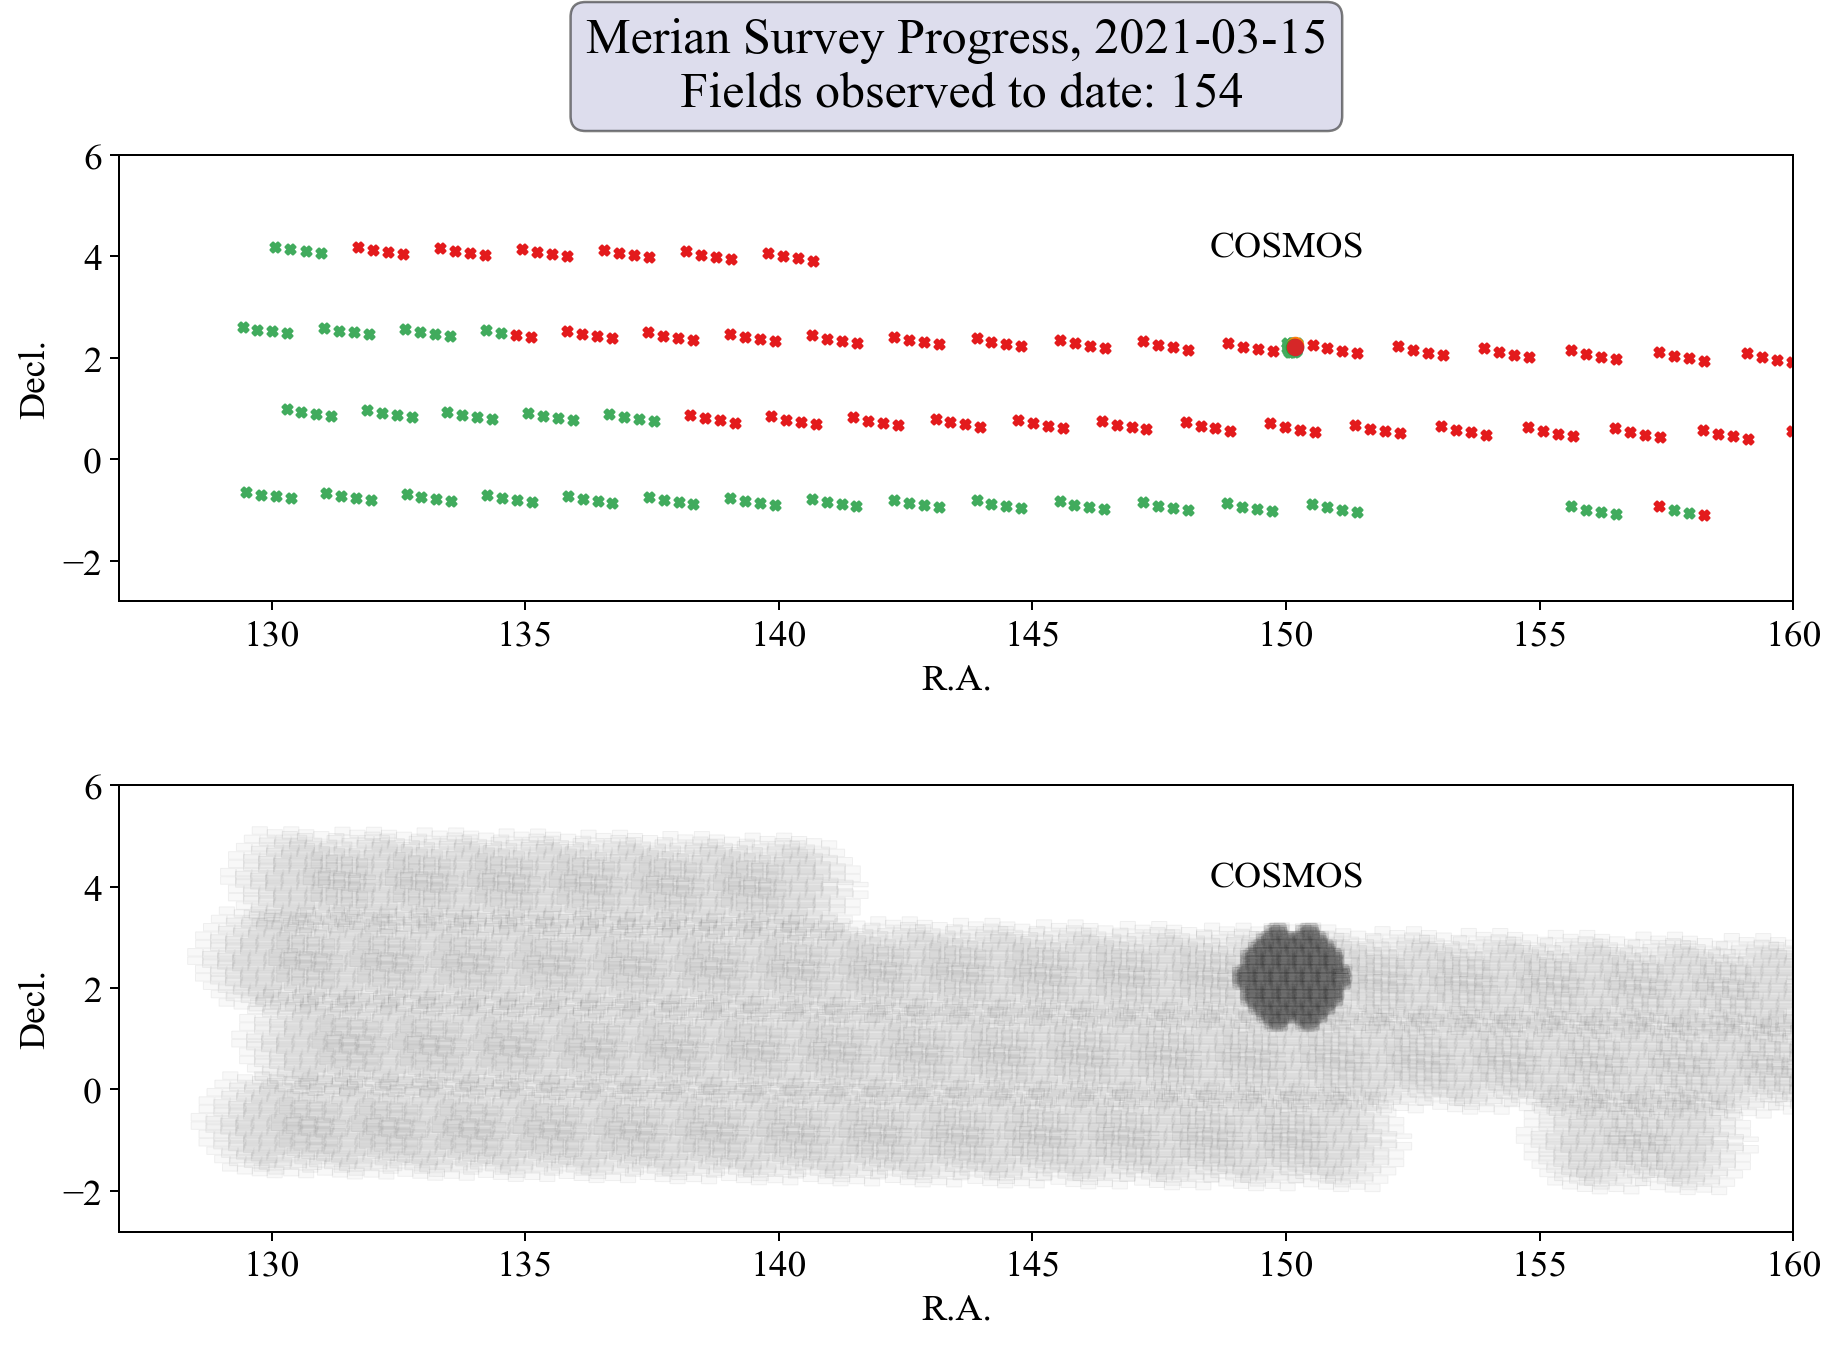

In [84]:
count_observed = 0
fig = plt.figure(1, figsize=(12, 8.5), dpi=180)
ax = fig.add_subplot(211, aspect='equal')
ax2 = fig.add_subplot(212, aspect='equal')
for i in range(len(ra)):
    obj_name = expected2021A['object.1'][i]
# for i in range(10):
    decam_corners = np.load(git_data_dir+'decam_corners.npy',allow_pickle='True')
    ccd_poly = []
    for j in range(len(decam_corners)):
        corners = decam_corners[j]
        radec = [ra[i],dec[i]]
        add_array = np.array([radec,radec,radec,radec])
        shift_array = np.add(corners, add_array)        
        poly = geometry.Polygon(shift_array)
        ccd_poly.append(poly)
    all_ccds = unary_union(ccd_poly)
    patch_ccd = PolygonPatch(all_ccds, edgecolor='k',facecolor='gray',lw=0.4,alpha=0.05)
#     if obj_name not in observed:
#         patch_ccd = PolygonPatch(all_ccds, edgecolor='k',facecolor='gray',lw=0.4,alpha=0.05)
#     else:
#         patch_ccd = PolygonPatch(all_ccds, edgecolor='k',facecolor='#41ab5d',lw=0.4,alpha=0.7)
    ax2.add_patch(patch_ccd)

    
for i in range(len(ra)):
    obj_name = expected2021A['object.1'][i]
    if obj_name not in observed:
        ax.scatter(ra[i],dec[i],s=15, color='#e31a1c', marker='X')
    else:
        count_observed += 1
        ax.scatter(ra[i],dec[i],s=15, color='#41ab5d', marker='X') # observed

        
# ax.set_xlim(125,225)
ax.set_xlim(127,160)
ax.set_ylim(-2.8,6)
ax2.set_xlim(127,160)
ax2.set_ylim(-2.8,6)

today = date.today()

# title = ax.set_title('Merian Survey Progress, '+str(today)+
#              '\n Fields observed to date: '+ str(count_observed), fontsize=20, bbox = dict(boxstyle = 'round', fc='#bcbddc', alpha=0.5))
title = ax.set_title('Merian Survey Progress, '+str(today)+
             '\n Fields observed to date: 154', fontsize=20, bbox = dict(boxstyle = 'round', fc='#bcbddc', alpha=0.5))


ax.scatter(ra1,dec1)
ax.scatter(ra2,dec2)
ax.scatter(ra3,dec3)
ax.scatter(ra4,dec4)

ax.set_xlabel('R.A.')
ax.set_ylabel('Decl.')
ax2.set_xlabel('R.A.')
ax2.set_ylabel('Decl.')

ax.text(148.5,4.0,'COSMOS', fontsize=15)
ax2.text(148.5,4.0,'COSMOS', fontsize=15)


# ax.add_artist(ab)


# ax2.text(127,-8.0,'2021A Observing Run Progress Summary \n Fields observed to date: '+ 
#          str(count_observed), bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', ls=':'))

fig.subplots_adjust(wspace=0.03)

